<a href="https://colab.research.google.com/github/RitulMohan/TF.Autoencoder/blob/main/Autoencoder_image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [10]:
encoder = Sequential([
  Flatten(input_shape=[28,28]), 
  Dense(400, activation='relu'), 
  Dense(200, activation ='relu'), 
  Dense(100, activation ='relu'), 
  Dense(50, activation ='relu'), 
  Dense(25, activation ='relu')
])

In [11]:
decoder = Sequential([
     Dense(50,input_shape=[25],activation='relu'), 
     Dense(100, activation='relu'), 
     Dense(200, activation='relu'), 
     Dense(400, activation ='relu') ,
     Dense(28 * 28, activation="sigmoid"), 
     Reshape([28,28])             
])

In [12]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2398 - accuracy: 0.1017 - val_loss: 0.1942 - val_accuracy: 0.1490
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1764 - accuracy: 0.1759 - val_loss: 0.1609 - val_accuracy: 0.1953
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1562 - accuracy: 0.2024 - val_loss: 0.1500 - val_accuracy: 0.2084
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1456 - accuracy: 0.2191 - val_loss: 0.1385 - val_accuracy: 0.2232
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1370 - accuracy: 0.2320 - val_loss: 0.1326 - val_accuracy: 0.2300


In [14]:
passed_images = autoencoder.predict(X_test[:10])

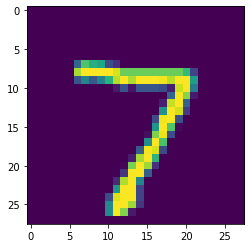

In [15]:
plt.imshow(X_test[0])

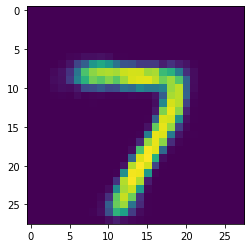

In [16]:
plt.imshow(passed_images[0])